In [1]:
import sys
sys.path.append("..")

import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from src.graphgen.graph_analyzer import *


In [2]:
analyzer = GraphAnalyzer('data/biodomain_edge_indices/Epigenetic.npy',
                         'data/biodomain_edge_indices/num_nodes.json',
                         'Epigenetic')

In [3]:
for key, value in analyzer.calculate_graph_properties().items():
    print(key)
    print(value)


Loaded Graph
{'Number of Nodes': 271, 'Number of Edges': 3683, 'Average Degree': '27.181', 'Clustering Coefficient': '0.376', 'Betweenness Centrality': '0.0043', 'Modularity': '0.256', 'Assortativity': '-0.018'}
Erdos-Renyi
{'Number of Nodes': 271, 'Number of Edges': 3701, 'Average Degree': '27.314', 'Clustering Coefficient': '0.100', 'Betweenness Centrality': '0.0035', 'Modularity': '0.142', 'Assortativity': '0.009'}
Barabasi-Albert
{'Number of Nodes': 271, 'Number of Edges': 1330, 'Average Degree': '9.815', 'Clustering Coefficient': '0.095', 'Betweenness Centrality': '0.0059', 'Modularity': '0.264', 'Assortativity': '-0.078'}
Watts-Strogatz
{'Number of Nodes': 271, 'Number of Edges': 542, 'Average Degree': '4.000', 'Clustering Coefficient': '0.300', 'Betweenness Centrality': '0.0170', 'Modularity': '0.743', 'Assortativity': '-0.120'}


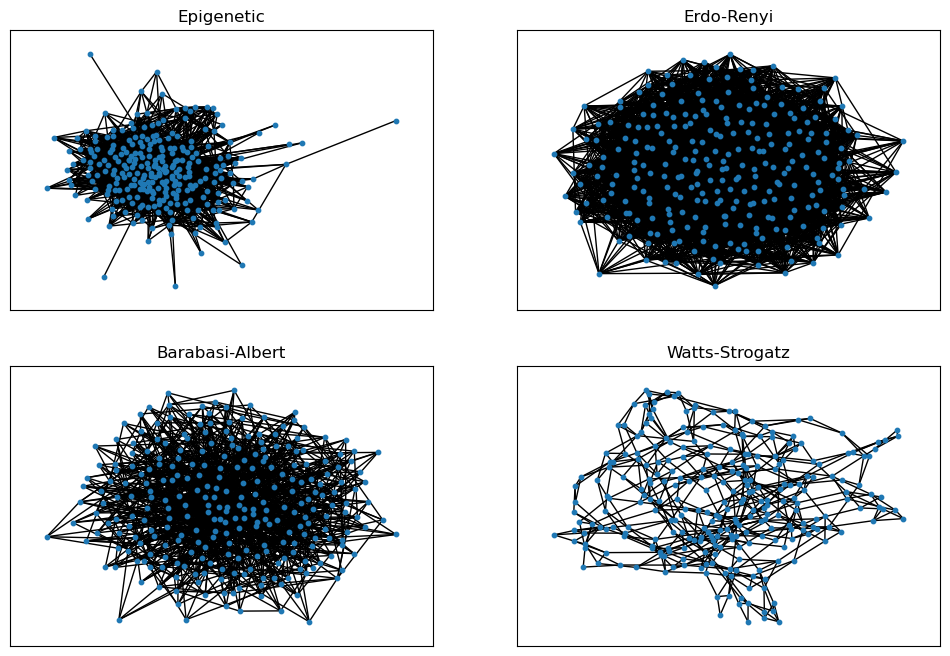

In [4]:
analyzer.visualize_graph()

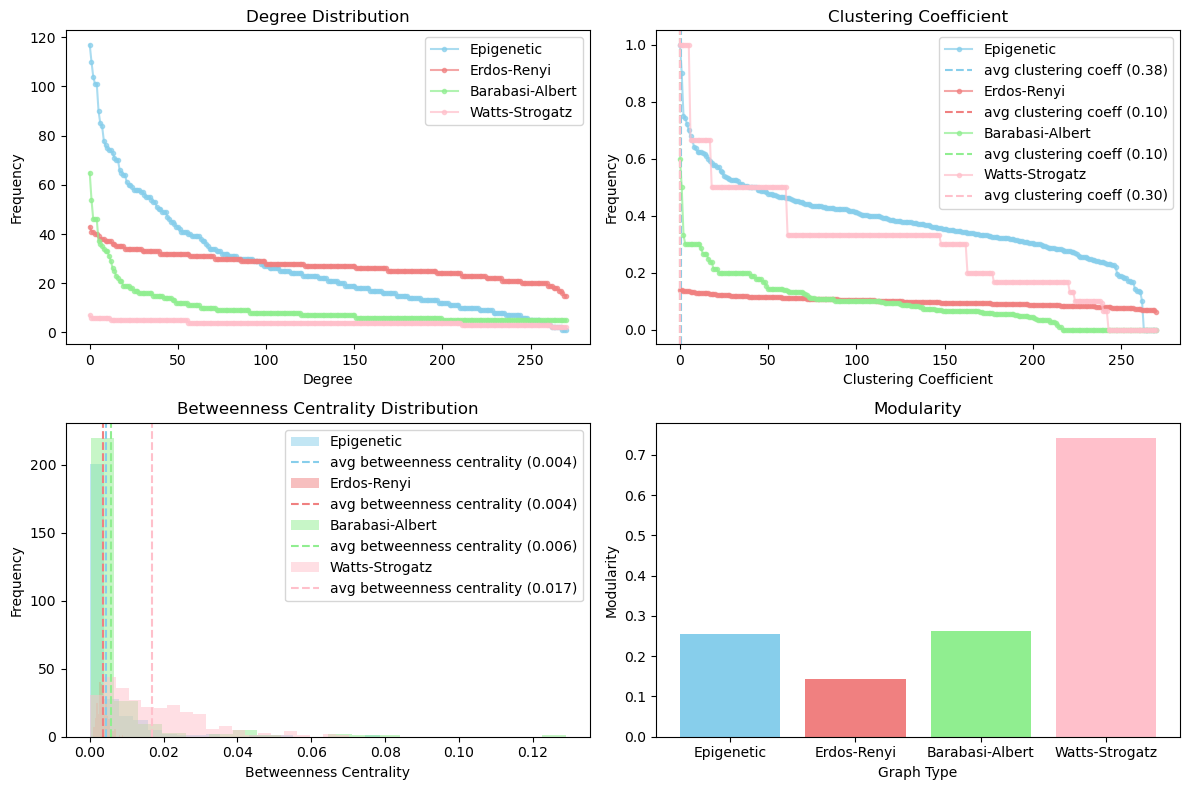

In [5]:
analyzer.visualize_distribution()

In [ ]:
# import glob
# from tqdm import tqdm

# dataset_files = {}
# for file in glob.glob('data/biodomain_edge_indices/*.npy'):
#     dataset_files[file.split('/')[-1].split('.')[0]] = file

# gene_graph_analysis = {}
# with open('gene_graph_analysis.txt', 'w') as f:
#     f.write('Gene Graph Analysis\n')
#     for file_name, file_path in tqdm(dataset_files.items()):
#         f.write(f'\nDATASET: {file_name}\n')
#         analyzer = GraphAnalyzer(file_path, 'data/biodomain_edge_indices/num_nodes.json', file_name)
#         graph_type_properties = {}
#         for graph_type, properties in analyzer.calculate_graph_properties().items():
#             f.write(f'{graph_type}: {properties}\n')
#             gene_graph_analysis[file_name] = graph_type_properties
# np.save('gene_graph_analysis.npy', gene_graph_analysis)

In [6]:
import glob
from tqdm import tqdm

# Get a list of dataset files
dataset_files = glob.glob('data/biodomain_edge_indices/*.npy')

gene_graph_analysis = {}
with open('gene_graph_analysis.txt', 'w') as f:
    f.write('Gene Graph Analysis\n')

    for file_path in tqdm(dataset_files):
        file_name = file_path.split('/')[-1].split('.')[0]
        with open('gene_graph_analysis.txt', 'a') as f:
            f.write(f'\nDATASET: {file_name}\n')

        analyzer = GraphAnalyzer(file_path, 'data/biodomain_edge_indices/num_nodes.json', file_name)
        graph_properties = analyzer.calculate_graph_properties()

        graph_type_properties = {}
        with open('gene_graph_analysis.txt', 'a') as f:
            for graph_type, properties in graph_properties.items():
                f.write(f'{graph_type}: {properties}\n')
                graph_type_properties[graph_type] = properties
        gene_graph_analysis[file_name] = graph_type_properties
np.save('gene_graph_analysis.npy', gene_graph_analysis)

100%|██████████| 18/18 [36:34<00:00, 121.91s/it]


In [7]:
data = np.load('gene_graph_analysis.npy', allow_pickle=True).item()
data

{'Endolysosome': {'Loaded Graph': {'Number of Nodes': 1361,
   'Number of Edges': 13157,
   'Average Degree': '19.334',
   'Clustering Coefficient': '0.286',
   'Betweenness Centrality': '0.0014',
   'Modularity': '0.469',
   'Assortativity': '0.208'},
  'Erdos-Renyi': {'Number of Nodes': 1361,
   'Number of Edges': 13107,
   'Average Degree': '19.261',
   'Clustering Coefficient': '0.014',
   'Betweenness Centrality': '0.0013',
   'Modularity': '0.192',
   'Assortativity': '0.003'},
  'Barabasi-Albert': {'Number of Nodes': 1361,
   'Number of Edges': 6780,
   'Average Degree': '9.963',
   'Clustering Coefficient': '0.029',
   'Betweenness Centrality': '0.0015',
   'Modularity': '0.278',
   'Assortativity': '-0.049'},
  'Watts-Strogatz': {'Number of Nodes': 1361,
   'Number of Edges': 2722,
   'Average Degree': '4.000',
   'Clustering Coefficient': '0.272',
   'Betweenness Centrality': '0.0047',
   'Modularity': '0.776',
   'Assortativity': '-0.045'}},
 'Apoptosis': {'Loaded Graph': {'

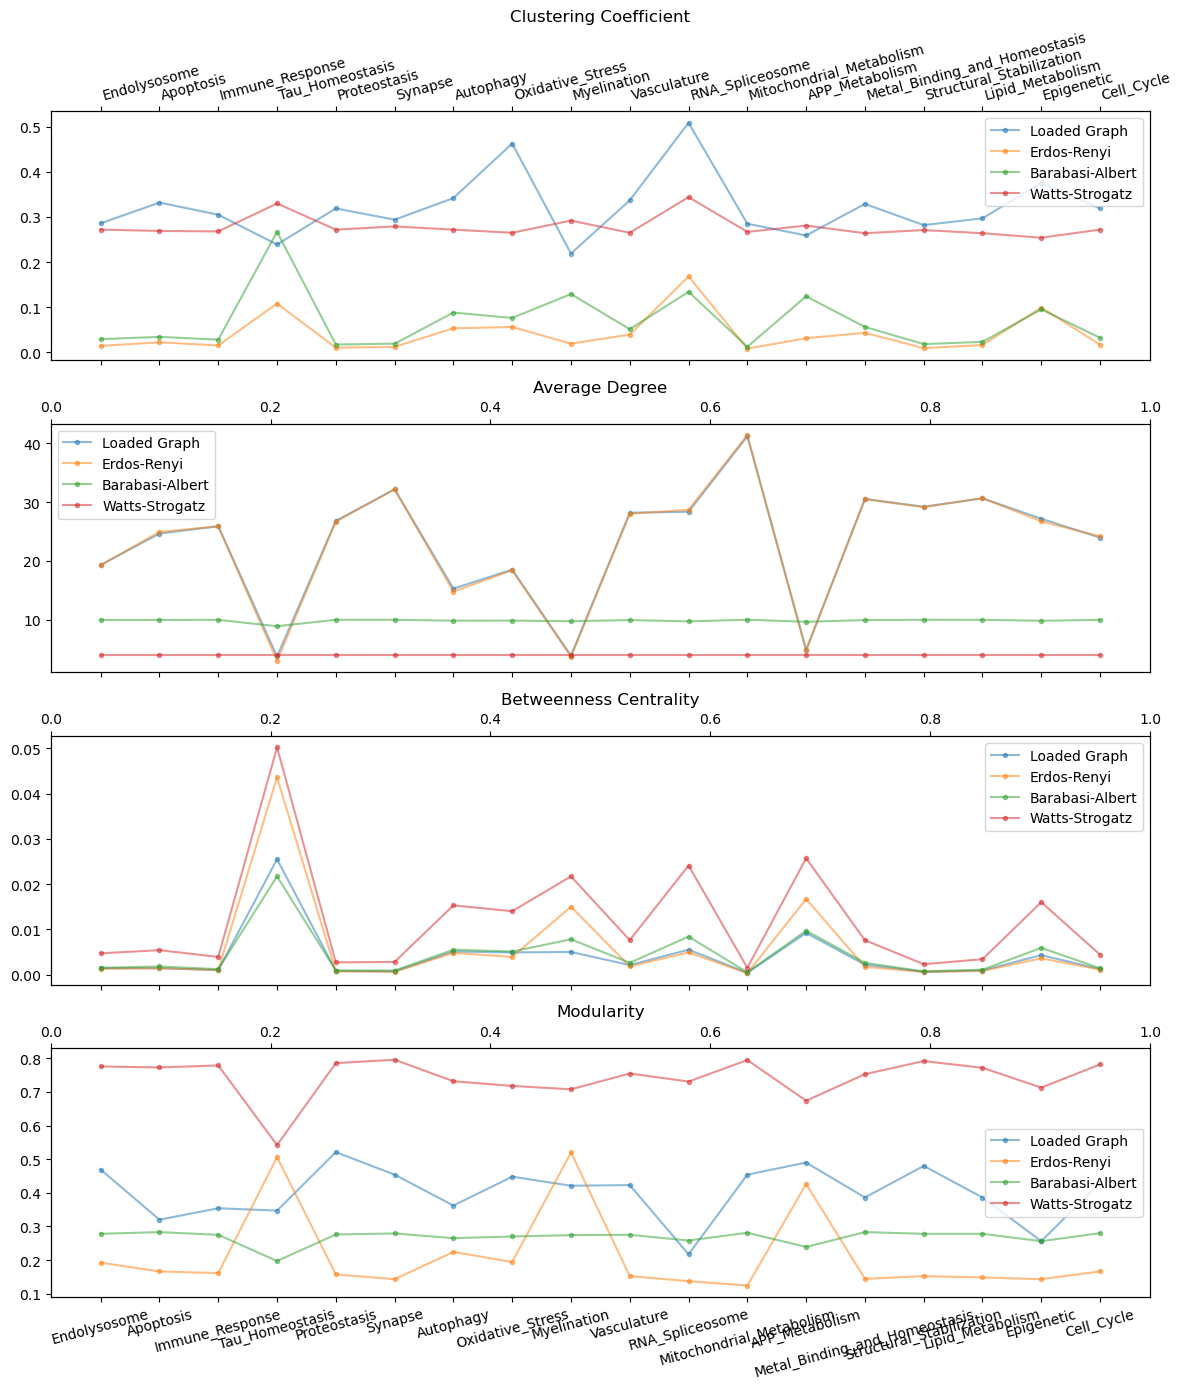

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Get a list of dataset names
dataset_names = list(data.keys())

_, ax = plt.subplots(4, 1, figsize=(12, 14), sharex=True)
axes_top = [ax.twiny() for ax in ax]

for i, property_name in enumerate(['Clustering Coefficient', 'Average Degree', 'Betweenness Centrality', 'Modularity']):
    for graph_type in data[dataset_names[0]].keys():
        property_values = [float(data[dataset_name][graph_type][property_name]) for dataset_name in dataset_names]
        ax[i].plot(dataset_names, property_values, label=graph_type, marker='.', alpha=0.5)
        ax[i].set_title(property_name)
        ax[i].tick_params(axis='x', labelrotation=15)
        ax[i].legend()

axes_top[0].set_xlim(ax[i].get_xlim())
axes_top[0].set_xticks(ax[i].get_xticks())
axes_top[0].set_xticklabels(dataset_names, rotation=15, ha='left')

plt.tight_layout()
plt.show()